# Linear classification: Preparation

In this class, we will prepare some visualization and data preprocessing tools for linear classification. 

We will start with **linear binary classification**, i.e. we will only have two classes with labels (1,-1).

## 1. Load the data

We start out loading all required packages:

In [278]:
import os

import numpy as np
import pandas as pd

%pylab inline
%config InlineBackend.figure_format='svg'

Populating the interactive namespace from numpy and matplotlib


Next we load the Iris data set from:

https://archive.ics.uci.edu/ml/datasets/iris

Since this data set has become the machine learning "Hello, World!"
equivalent, it is also a part of many machine learning libraries (i.e. have a look
at submodule `datasets` of `sklearn` library).

Note that the column names are missing in the CSV file. They are described in
the accompanying file
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names.

In [279]:
file_name = 'iris_data_set.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal length [cm]', 'sepal width [cm]',
                'petal length [cm]', 'petal width [cm]', 'iris type']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `iris_data_set.csv`...


Let us inspect the data:

In [280]:
df

,Unnamed: 0,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],iris type
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Assign class labels

There are three classes in the Iris dataset. Since we work with binary classification in this class, we will merge two of the original classes into one. Now Iris-setosa will have class label -1 and the two other kinds of irises will form class with label 1:

In [281]:
df['class'] = df['iris type'].replace(
    ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [-1, 1, 1])

## 2. Train-test split 

In ML application, we typically split the data into train and test subsets. It is also common to shuffle the data before learning to avoid non-random order in the dataset. 

We define a function to perform this:

In [282]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    '''
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.
    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.
    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.
    '''
    
    if shuffle is True:
        df_ = df.sample(frac=1).reset_index(drop=True)
    else:
        df_= df
    
    train_df = df_.iloc[:round(training_data_fraction*len(df_)),:]
    test_df = df_.iloc[round(training_data_fraction*len(df_)):,:]
    
    return df_, train_df, test_df

Which can be used as follows:

In [283]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
Y = df['class'].to_numpy()

train_X = train_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
train_Y = train_df['class'].to_numpy()

test_X = test_df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
test_Y = test_df['class'].to_numpy()

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 120
      Test data samples: 30


## 3. Plot the training data

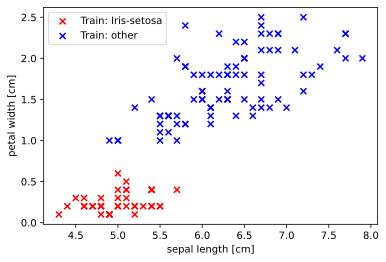

In [285]:
fig, ax = plt.subplots()

train_X_minus1 = train_X[train_Y == -1]
plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa')

train_X_plus1 = train_X[train_Y == +1]
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()

## 4. Define a linear hypothesis for binary classification

We will define the hypothesis $h_{w,b}(x)=\text{sign}(w\cdot x+b)$ as a
Python class to keep track of the internal weight vector $w$ and bias term
$b$. 

In [286]:
class LinearBinaryClassification:

    def __init__(self, w, b):
        self._w = w
        self._b = b
    def h(self, x):
        # Numpy's `where` function provides a fast substitution
        return np.where(x @ self._w + self._b >= 0.0, 1, -1)

This class can now be used as follows:

In [287]:
w = np.array([0.2, 1])
b = -1.8
model = LinearBinaryClassification(w, b)

x = np.array([4, 5])

print(f'For given weight row vector w={w}, bias term b={b}, and argument vector x={x},\n'
      f'the hypothesis h evaluated at x equals {model.h(x)}.')

For given weight row vector w=[0.2 1. ], bias term b=-1.8, and argument vector x=[4 5],
the hypothesis h evaluated at x equals 1.


## 5. Choose a hypothesis manually and plotting the decision regions

In [288]:
w = np.array([-1, 3])
b = 1
model = LinearBinaryClassification(w, b)

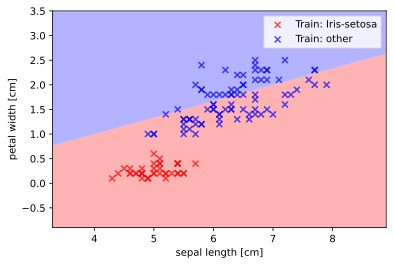

In [289]:
fig, ax = plt.subplots()

# compute how large the mesh for the contour plot shall be (with +/- 1 as
# safety bleed)
x1_min = train_X[:, 0].min() - 1
x1_max = train_X[:, 0].max() + 1
x2_min = train_X[:, 1].min() - 1
x2_max = train_X[:, 1].max() + 1

# compute grid for contour plot
x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))
# meshgrid produces two arrays of the size `len(np.arange(x1_min, x1_max,
# .01))` times `len(np.arange(x2_min, x2_max, .01))` so that computations can
# be easily be vectorized.
X_list = np.dstack([x1_list, x2_list])
# present X_list to our hypothesis for evaluation
h_list = model.h(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.xlim(x1_min, x1_max)
plt.ylabel('petal width [cm]')
plt.ylim(x2_min, x2_max)
plt.legend()

## 6. Count the number of errors in the classification of the training data

In [290]:
N = len(train_X)
train_errors = np.sum(model.h(train_X).ravel() != train_Y)
print(f'Sample size: {N}')
print(f'Number of correct classifications: {N - train_errors}')
print(f'Number of incorrect classifications: {train_errors}')

Sample size: 120
Number of correct classifications: 70
Number of incorrect classifications: 50


## 7. Add the test data to the plot

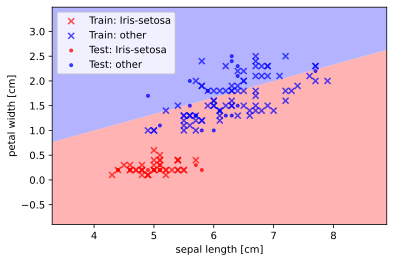

In [292]:
fig, ax = plt.subplots()

plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

test_X_minus1 = test_X[test_Y == -1]
test_X_plus1 = test_X[test_Y == +1]
plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()

Compute the number of errors on the test data

In [293]:
M = len(test_X)
test_errors = np.sum(model.h(test_X).ravel() != test_Y)
print(f'Sample size: {M}')
print(f'Number of correct classifications: {M - test_errors}')
print(f'Number of incorrect classifications: {test_errors}')

Sample size: 30
Number of correct classifications: 19
Number of incorrect classifications: 11


And (redundantly) the total number of classification errors for training and
test data altogether

In [294]:
total = len(X)
errors = np.sum(model.h(X).ravel() != Y)
print(f'Total sample size: {total}')
print(f'Number of correct classifications: {total - errors}')
print(f'Number of incorrect classifications: {errors}')

Total sample size: 150
Number of correct classifications: 89
Number of incorrect classifications: 61


## 8. Is the data linearly separable?

Yes. Try $w=(0, 1)$ and $b=-0.8$ and observe the total number of errors.

In [295]:
w = np.array([0, 1])
b = -0.8
model = LinearBinaryClassification(w, b)

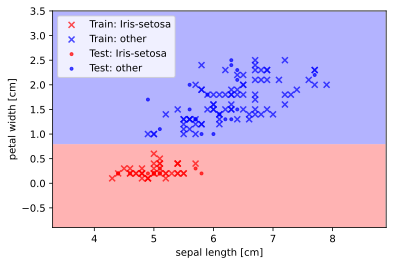

In [296]:
h_list = model.h(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('sepal length [cm]')
plt.xlim(x1_min, x1_max)
plt.ylabel('petal width [cm]')
plt.ylim(x2_min, x2_max)
plt.legend()

Confirm that all the data points are classified correctly:

In [297]:
total = len(X)
errors = np.sum(model.h(X).ravel() != Y)
print(f'Total sample size: {total}')
print(f'Number of correct classifications: {total - errors}')
print(f'Number of incorrect classifications: {errors}')

Total sample size: 150
Number of correct classifications: 150
Number of incorrect classifications: 0


## 9. Exercise 

Implement an ordinary least squares (OLS) classifier. To do so, add an ```OLS()``` method to our```LinearBinaryClassification``` class, which changes the classifier's parameters to the OLS solution (with or without intercept).